In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

In [15]:
# Step 1: Input or generate (x1, x2) points
N = 20  # Number of points
x1 = np.random.randint(-30, 31, N)
x2 = np.random.randint(-30, 31, N)
X = np.column_stack((x1, x2))
X

array([[  7,  10],
       [-23, -28],
       [  2, -26],
       [ 16,  12],
       [ 29,  27],
       [ 17,  14],
       [ 12,  21],
       [-30, -28],
       [  0,  12],
       [-24,  18],
       [-23,  13],
       [ 23,  -3],
       [ 21, -30],
       [-18,   5],
       [ 29,   4],
       [ 13,  10],
       [  6,  21],
       [-28, -21],
       [ 26,   5],
       [ -3, -15]])

In [16]:
# Step 2: Calculate labels y based on the formula y = sign(x1 + 2*x2 - 1.5)
y = np.sign(x1 + 2 * x2 - 1.5)

In [17]:
# Step 3: Train the perceptron model using scikit-learn
clf = Perceptron(tol=1e-3, max_iter=1000, random_state=0)
clf.fit(X, y)

# Get the weights and bias
w = clf.coef_[0]
b = clf.intercept_[0]
iterations = clf.n_iter_

In [18]:
# Step 4: Plot the decision boundary after training
def plot_decision_boundary(X, y, w, b, iteration, title):
    plt.figure(figsize=(8, 8))
    
    # Plot the points
    for i in range(N):
        if y[i] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='blue', label='+1' if i == 0 else "")
        else:
            plt.scatter(X[i, 0], X[i, 1], color='red', label='-1' if i == 0 else "")
    
    # Plot the perceptron decision boundary: w1*x1 + w2*x2 + b = 0
    x_vals = np.linspace(-30, 30, 100)
    y_vals_perceptron = (-w[0] * x_vals - b) / w[1]
    plt.plot(x_vals, y_vals_perceptron, 'g-', label=f'Perceptron Decision Boundary')

    # Plot the original target function x1 + 2*x2 - 1.5 = 0
    y_vals_target = (-x_vals + 1.5) / 2
    plt.plot(x_vals, y_vals_target, 'k--', label='Target function')

    # Set plot labels, legend, and grid
    plt.xlim([-35, 35])
    plt.ylim([-35, 35])
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

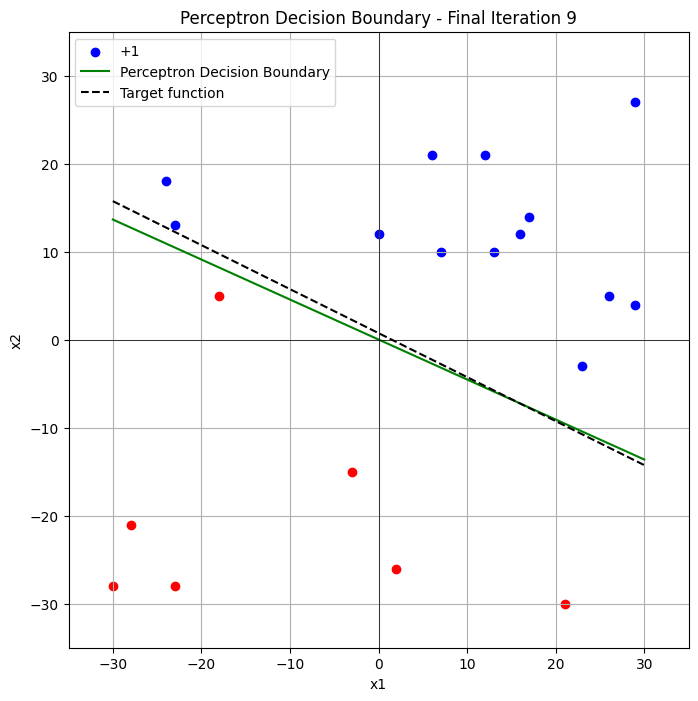

Perceptron converged in 9 iterations.


In [19]:
# Step 5: Plot the final decision boundary and display the number of iterations
plot_decision_boundary(X, y, w, b, iterations, f'Perceptron Decision Boundary - Final Iteration {iterations}')
print(f"Perceptron converged in {iterations} iterations.")
